In [1]:
import matplotlib.pyplot as plt
from matplotlib import rc
import numpy as np
from scipy.optimize import curve_fit
from uncertainties import ufloat
from uncertainties import unumpy as unp
import array_to_latex as a2l
import csv
import pandas as pd
from astropy.io.votable import parse
from astropy.table import QTable, Table, Column

rc('font', **{'family': 'serif', 'serif': ['Computer Modern']}) #font na grafih je LaTexov
rc('text', usetex=True)

In [10]:
d = unp.uarray([8.9e-2, 8.0e-2], [0.1e-2, 0.1e-2])
N = unp.uarray([10, 9], [0, 0])

r1 = unp.uarray([48.7e-3], [0.1e-3])
a = unp.uarray([55e-2], [0.5e-2])

valdol = d / N  

valdol = unp.uarray(np.average(unp.nominal_values(valdol)), np.average(unp.std_devs(valdol)))

f = r1 ** 2 / valdol

b = (1 / f - 1 / a) ** (-1)



valdol, f * 1e2, b * 1e2

(array(0.008894444444444444+/-0.00010555555555555555, dtype=object),
 array([26.664846970643346+/-0.3348590244123977], dtype=object),
 array([51.757849405858046+/-1.337087791762378], dtype=object))

In [7]:
data = np.loadtxt('meritve.txt')

print(a2l.to_ltx(data, frmt='{:6.0f}', arraytype='array'))

\begin{array}
       1  &     724 \\
       2  &     730 \\
       3  &     654 \\
       4  &     674 \\
       5  &     614 \\
       6  &     580 \\
       7  &     560 \\
       8  &     540 \\
       9  &     485 \\
      10  &     500 
\end{array}
None


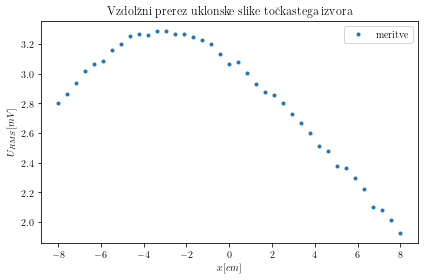

In [19]:
data_v = np.loadtxt('vzdolz.txt')

x = np.linspace(-8, 8, 39)

fig, ax = plt.subplots()

ax.scatter(x, data_v, marker='.', label='meritve')

ax.set_title('Vzdolžni prerez uklonske slike točkastega izvora')
ax.set_xlabel(r'$x [cm]$')
ax.set_ylabel(r'$U_{RMS} [mV]$')
ax.legend()
fig.tight_layout()
fig.savefig('vzdolz.pdf')


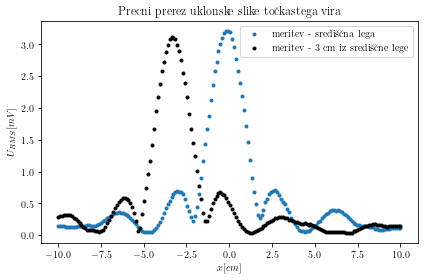

In [24]:
data_p = np.loadtxt('precno.txt')
data_p3 = np.loadtxt('3cm_precno.txt')

fig, ax = plt.subplots()

x = np.linspace(-10, 10, 176)

ax.scatter(x, data_p, marker='.', label='meritev - središčna lega')
ax.scatter(x, data_p3, marker='.', color='k', label='meritev - 3 cm iz središčne lege')

ax.set_title('Precni prerez uklonske slike točkastega vira')
ax.set_xlabel(r'$x [cm]$')
ax.set_ylabel(r'$U_{RMS} [mV]$')
ax.legend()
fig.tight_layout()
fig.savefig('precno.pdf')